In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ga = pd.read_csv("../results/results.csv")
df_ql = pd.read_csv("../results/results-qLearning.csv")
df_optimal = pd.read_csv("../results/results-optimal.csv")

=== Average fitness ± standard deviation per instances ===
                           GA_mean        GA_std    QL-GA_mean     QL-GA_std
instance                                                                    
n00050_R01000_s002.kp    20742.750    476.505959  2.014789e+04    504.197988
n00050_R01000_s003.kp    20543.250    528.185776  1.994900e+04    385.151594
n00050_R10000_s002.kp   206578.625   5010.224088  2.013458e+05   3546.658525
n00050_R10000_s003.kp   206418.625   3453.215269  1.973050e+05   3090.816316
n00100_R01000_s002.kp    30168.250   2085.746030  2.791400e+04    646.457462
n00100_R01000_s003.kp    33876.875   2300.828015  3.155556e+04    932.569717
n00100_R10000_s002.kp   300127.625  18600.156520  2.754722e+05  10245.410994
n00100_R10000_s003.kp   340652.000  19470.045359  3.145780e+05   7730.548089
n00200_R01000_s002.kp    73404.500   4427.914730  6.981567e+04   1530.785174
n00200_R01000_s003.kp    67313.125   3166.180233  6.263300e+04   1417.160365
n00200_R10000_s00

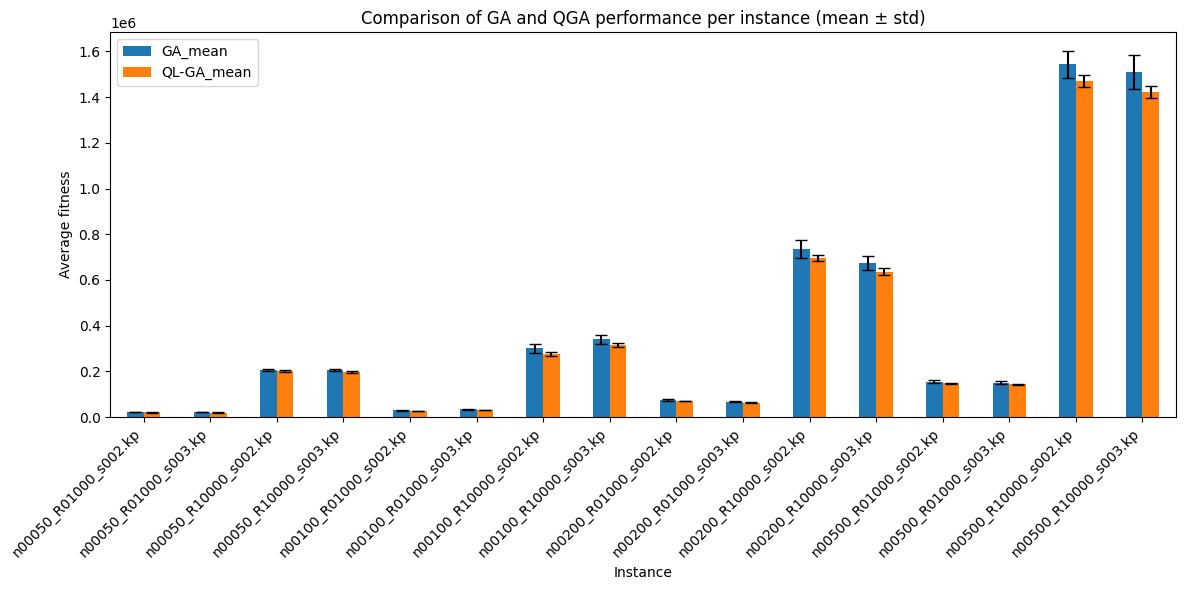

In [3]:
# --- First graph: GA vs QGA mean ± std ---
avg_ga = df_ga.groupby("instance")["fitness"].agg(["mean", "std"]).rename(columns={"mean": "GA_mean", "std": "GA_std"})
avg_ql = df_ql.groupby("instance")["fitness"].agg(["mean", "std"]).rename(columns={"mean": "QL-GA_mean", "std": "QL-GA_std"})

results = avg_ga.join(avg_ql, how="inner")

print("=== Average fitness ± standard deviation per instances ===")
print(results)

results_means = results[["GA_mean", "QL-GA_mean"]]
results_stds = results[["GA_std", "QL-GA_std"]]

ax = results_means.plot(
    kind="bar",
    yerr=results_stds.values.T,
    figsize=(12, 6),
    capsize=4,  
)

plt.title("Comparison of GA and QGA performance per instance (mean ± std)")
plt.ylabel("Average fitness")
plt.xlabel("Instance")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
# Save figure
plt.savefig("../results/plots/ga_vs_qga_per_instance.png", dpi=300, bbox_inches="tight")
plt.show()

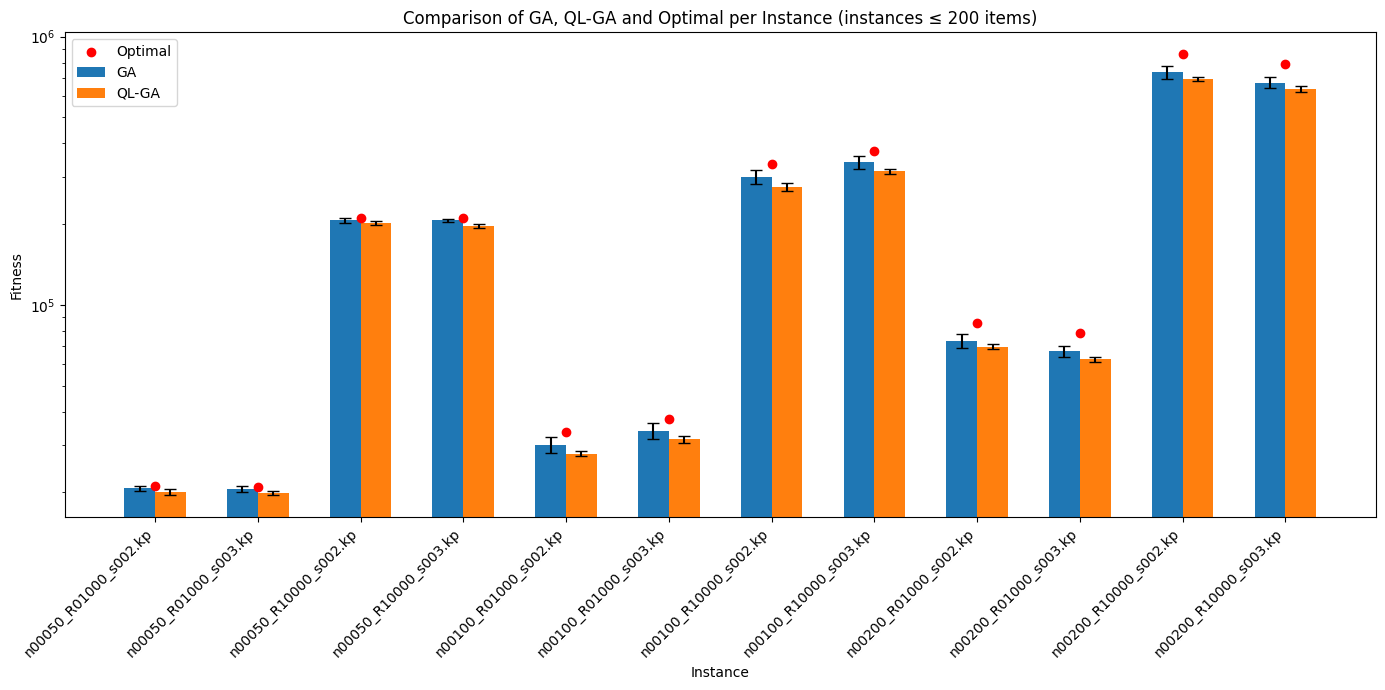

In [4]:
# --- Second graph: GA vs QGA vs Optimal (filtered) ---
# Keep only instances with optimal values
valid_instances = df_optimal["instance"].unique()
df_ql_filtered = df_ql[df_ql["instance"].isin(valid_instances)]
df_ga_filtered = df_ga[df_ga["instance"].isin(valid_instances)]

# Compute mean and std per instance
avg_ql_filtered = df_ql_filtered.groupby("instance")["fitness"].agg(["mean", "std"]).rename(columns={"mean": "QL-GA_mean", "std": "QL-GA_std"})
avg_ga_filtered = df_ga_filtered.groupby("instance")["fitness"].agg(["mean", "std"]).rename(columns={"mean": "GA_mean", "std": "GA_std"})

results_filtered = avg_ga_filtered.join(avg_ql_filtered, how="inner")
results_filtered = results_filtered.join(df_optimal.set_index("instance"), how="inner")
results_filtered = results_filtered.sort_index()

x = np.arange(len(results_filtered))
width = 0.3

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x - width/2, results_filtered["GA_mean"], width, yerr=results_filtered["GA_std"], capsize=4, label="GA")
ax.bar(x + width/2, results_filtered["QL-GA_mean"], width, yerr=results_filtered["QL-GA_std"], capsize=4, label="QL-GA")
ax.scatter(x, results_filtered["optimal_fitness"], marker='o', color='red', label="Optimal",)

ax.set_title("Comparison of GA, QL-GA and Optimal per Instance (instances ≤ 200 items)")
ax.set_xlabel("Instance")
ax.set_ylabel("Fitness")
ax.set_xticks(x)
ax.set_xticklabels(results_filtered.index, rotation=45, ha="right")
ax.legend()
ax.set_yscale("log")
plt.tight_layout()
plt.savefig("../results/plots/ga_qga_vs_optimal_filtered.png", dpi=300)
plt.show()

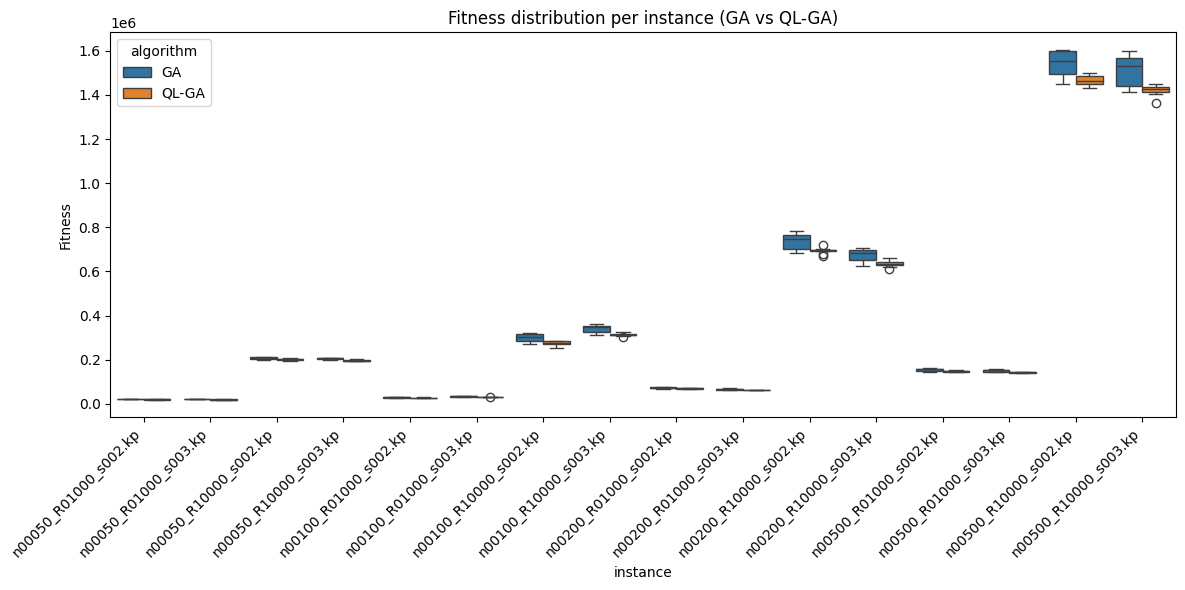

In [5]:
# Third graph: Distribution per instances
df_ga_distribution = df_ga[["instance", "fitness"]].assign(algorithm="GA")
df_ql_distribution = df_ql[["instance", "fitness"]].assign(algorithm="QL-GA")

df_all_distribution = pd.concat([df_ga_distribution, df_ql_distribution])

plt.figure(figsize=(12, 6))
sns.boxplot(x="instance", y="fitness", hue="algorithm", data=df_all_distribution)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Fitness")
plt.title("Fitness distribution per instance (GA vs QL-GA)")
plt.tight_layout()
plt.savefig("../results/plots/ga_vs_qga_disribution.png", dpi=300)
plt.show()


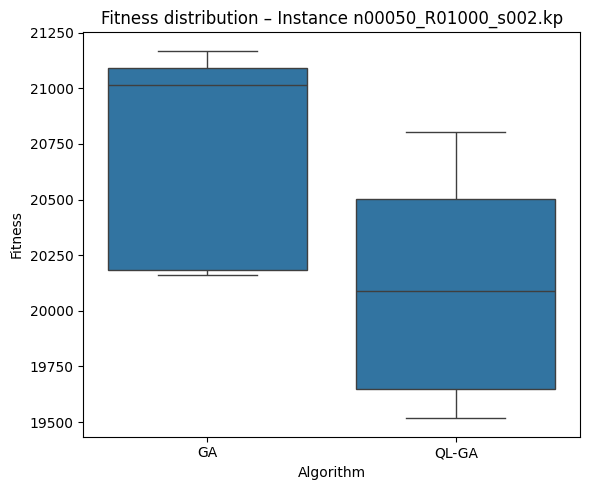

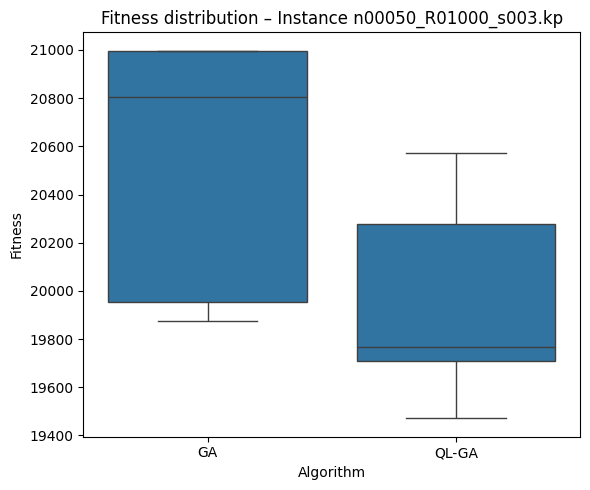

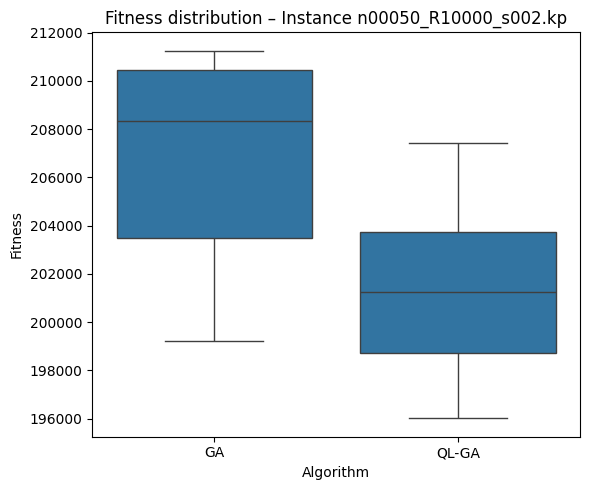

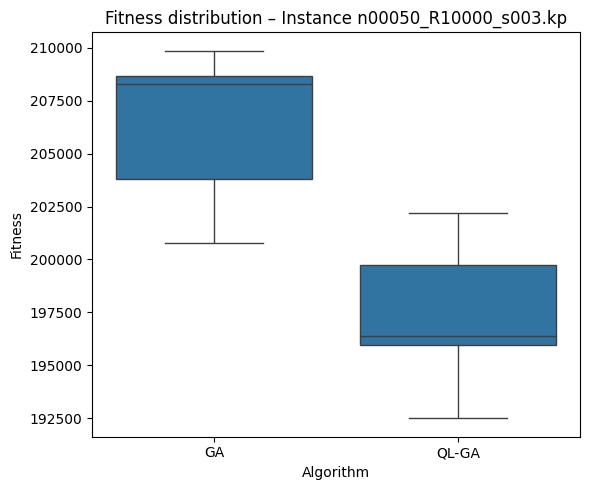

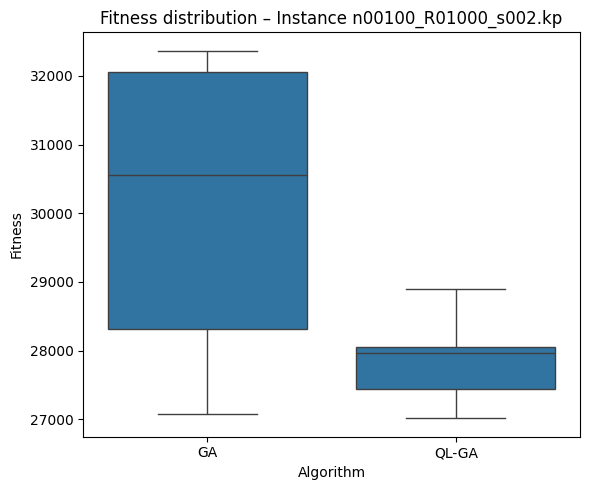

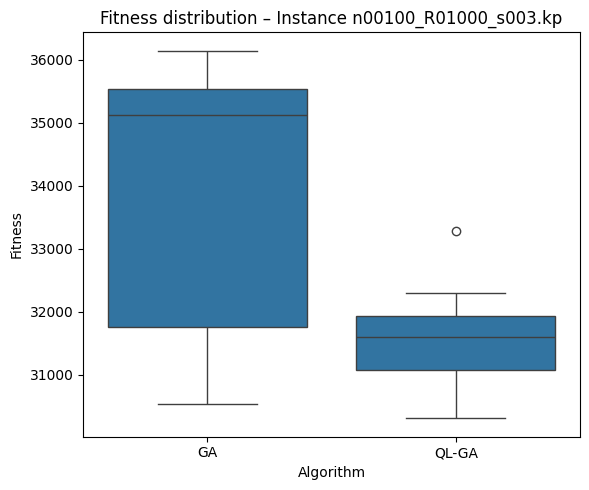

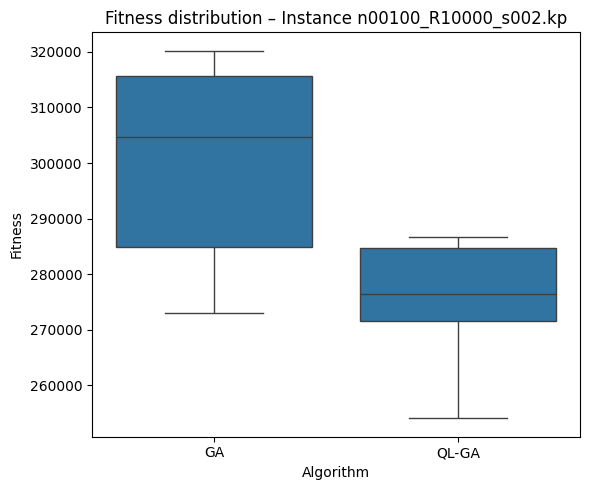

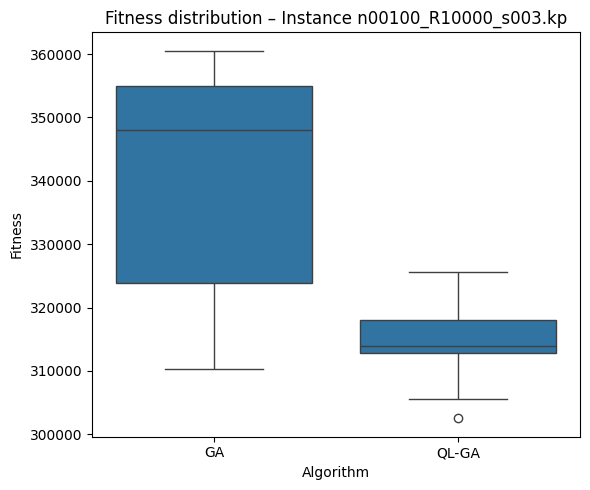

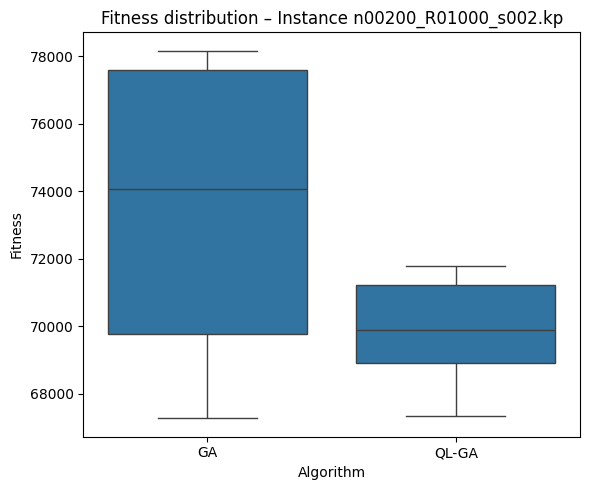

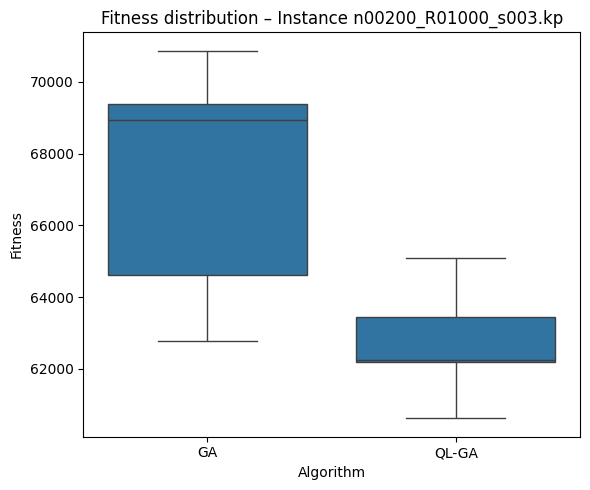

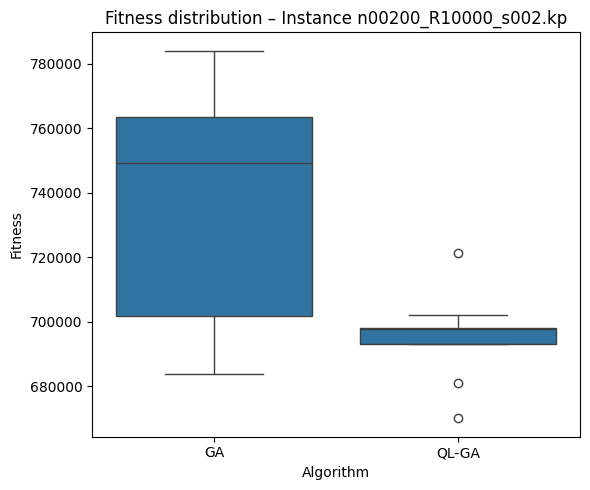

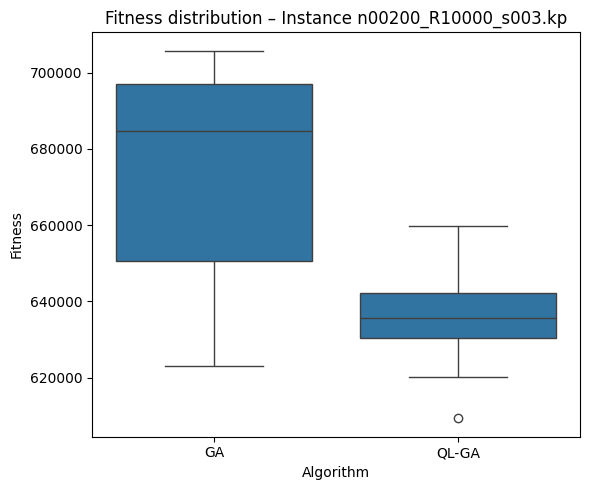

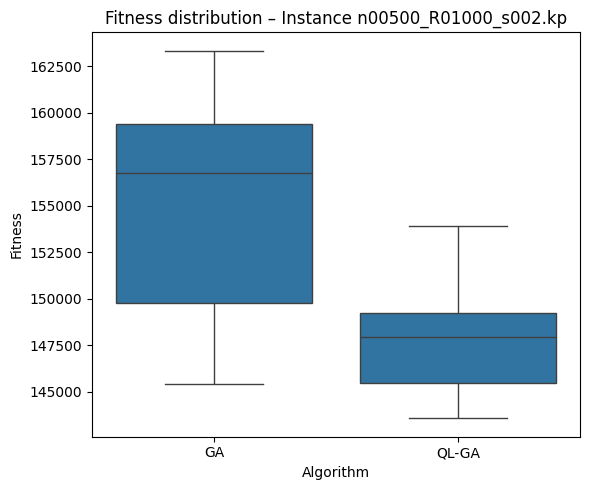

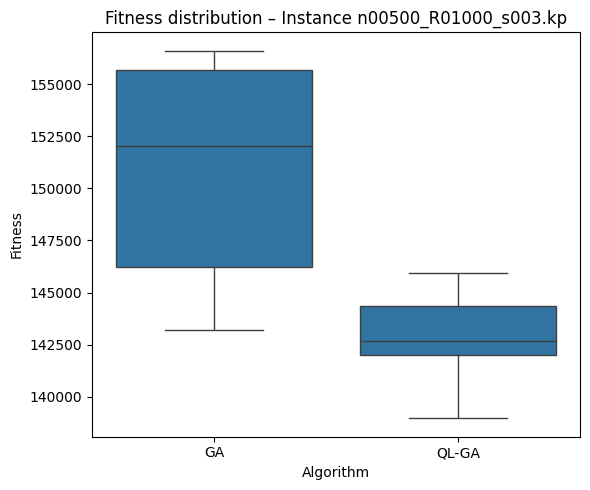

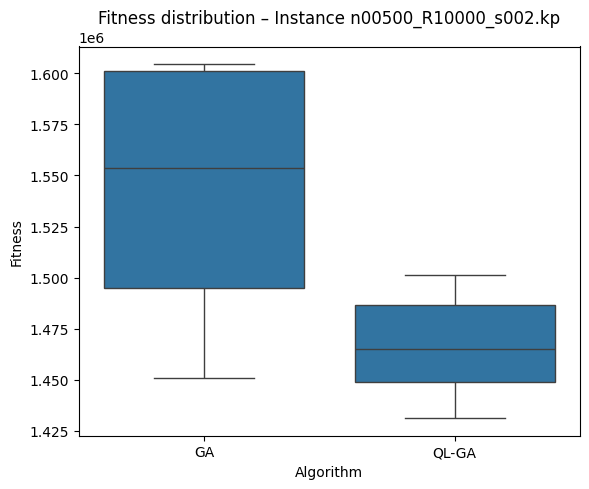

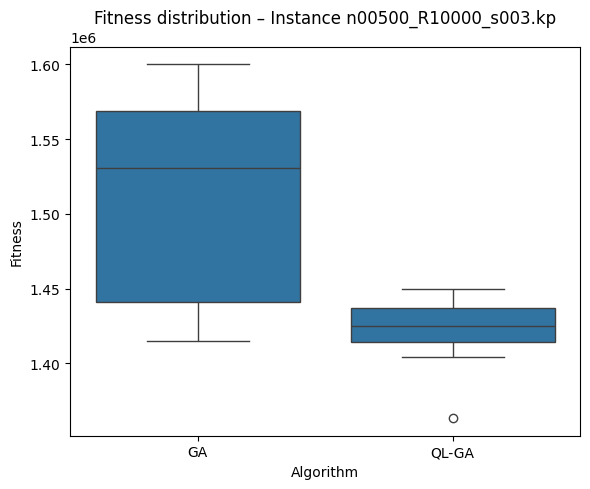

In [6]:
# Forth graph: fitness distribution
instances = df_all_distribution["instance"].unique()
for inst in instances:
    df_inst = df_all_distribution[df_all_distribution["instance"] == inst]
    
    plt.figure(figsize=(6,5))
    sns.boxplot(x="algorithm", y="fitness", data=df_inst)
    plt.title(f"Fitness distribution – Instance {inst}")
    plt.ylabel("Fitness")
    plt.xlabel("Algorithm")
    plt.tight_layout()
    plt.savefig(f"../results/plots/distributions/{inst[:-3]}.png", dpi=300)
    plt.show()

In [7]:
# import math

# # --- GA ---
# instances = df_ga["instance"].unique()
# n_instances = len(instances)

# # napravi grid (npr. 3 kolone)
# ncols = 3
# nrows = math.ceil(n_instances / ncols)

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows*4), constrained_layout=True)

# for ax, inst in zip(axes.flatten(), instances):
#     sns.boxplot(
#         x="config_id", y="fitness",
#         data=df_ga[df_ga["instance"] == inst],
#         ax=ax
#     )
#     ax.set_title(f"GA – {inst}")
#     ax.set_xlabel("Config ID")
#     ax.set_ylabel("Fitness")
#     ax.tick_params(axis='x', rotation=45)

# # ako grid ima više polja nego instanci – obriši prazne
# for ax in axes.flatten()[len(instances):]:
#     ax.set_visible(False)

# plt.suptitle("GA – Distribucija fitnessa po konfiguracijama (po instanci)", fontsize=16)
# plt.savefig("plots/ga_config_distribution_per_instance.png", dpi=300)
# plt.show()


In [8]:
# import math

# # --- QL-GA ---
# instances = df_ql["instance"].unique()
# n_instances = len(instances)

# # napravi grid (npr. 3 kolone)
# ncols = 3
# nrows = math.ceil(n_instances / ncols)

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows*4), constrained_layout=True)

# for ax, inst in zip(axes.flatten(), instances):
#     sns.boxplot(
#         x="config_id", y="fitness",
#         data=df_ql[df_ql["instance"] == inst],
#         ax=ax
#     )
#     ax.set_title(f"QL-GA – {inst}")
#     ax.set_xlabel("Config ID")
#     ax.set_ylabel("Fitness")
#     ax.tick_params(axis='x', rotation=45)

# # ako grid ima više polja nego instanci – obriši prazne
# for ax in axes.flatten()[len(instances):]:
#     ax.set_visible(False)

# plt.suptitle("QL-GA – Distribucija fitnessa po konfiguracijama (po instanci)", fontsize=16)
# # plt.savefig("plots/ga_config_distribution_per_instance.png", dpi=300)
# plt.show()